In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import holidays
import logging


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

logging.info("Imports successfully completed and logging is set up.")


2024-09-20 18:53:53,675 - INFO - Imports successfully completed and logging is set up.


In [46]:
# Load data into the DataFrame
df = pd.read_csv("C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/Rossmann_Sales_Forecasting_Project/data/synthetic_sales_data.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Display the first few rows to verify
df.head()


,Store,Store_Type,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales
Date,,,,,,,,
2021-01-01,1,supermarket,1,0,0,0,124,0
2021-01-02,1,pharmacy,1,0,0,0,87,0
2021-01-03,1,supermarket,1,1,0,0,74,778
2021-01-04,1,supermarket,0,1,0,0,0,0
2021-01-05,1,pharmacy,1,1,0,0,76,1002


In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10950 entries, 2021-01-01 to 2023-12-31
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Store           10950 non-null  int64 
 1   Store_Type      10950 non-null  object
 2   Store_Status    10950 non-null  int64 
 3   Promo           10950 non-null  int64 
 4   Promo2          10950 non-null  int64 
 5   School_Holiday  10950 non-null  int64 
 6   Customers       10950 non-null  int64 
 7   Sales           10950 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 769.9+ KB
None


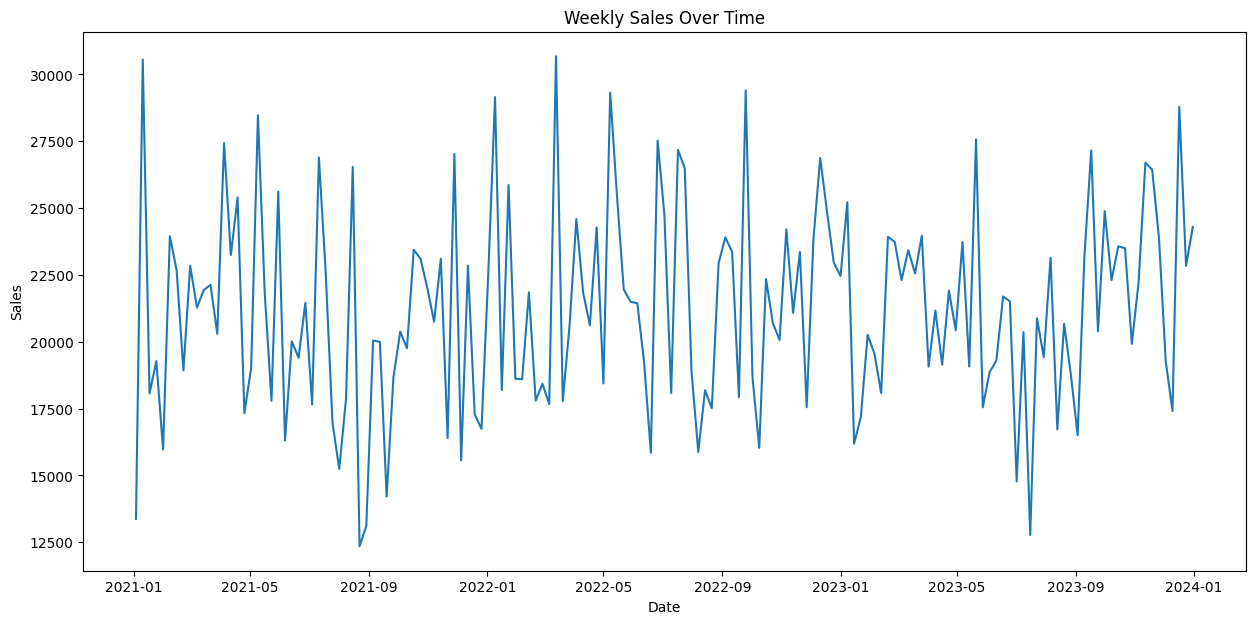

In [48]:
#1. weekly Sales over Time
weekly_sales = df['Sales'].resample('W').sum()

# Time series plot of weekly sales
plt.figure(figsize=(15, 7))
plt.plot(weekly_sales.index, weekly_sales)
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


C:\Users\hayyu.ragea\AppData\Local\Temp\ipykernel_19960\189832751.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()


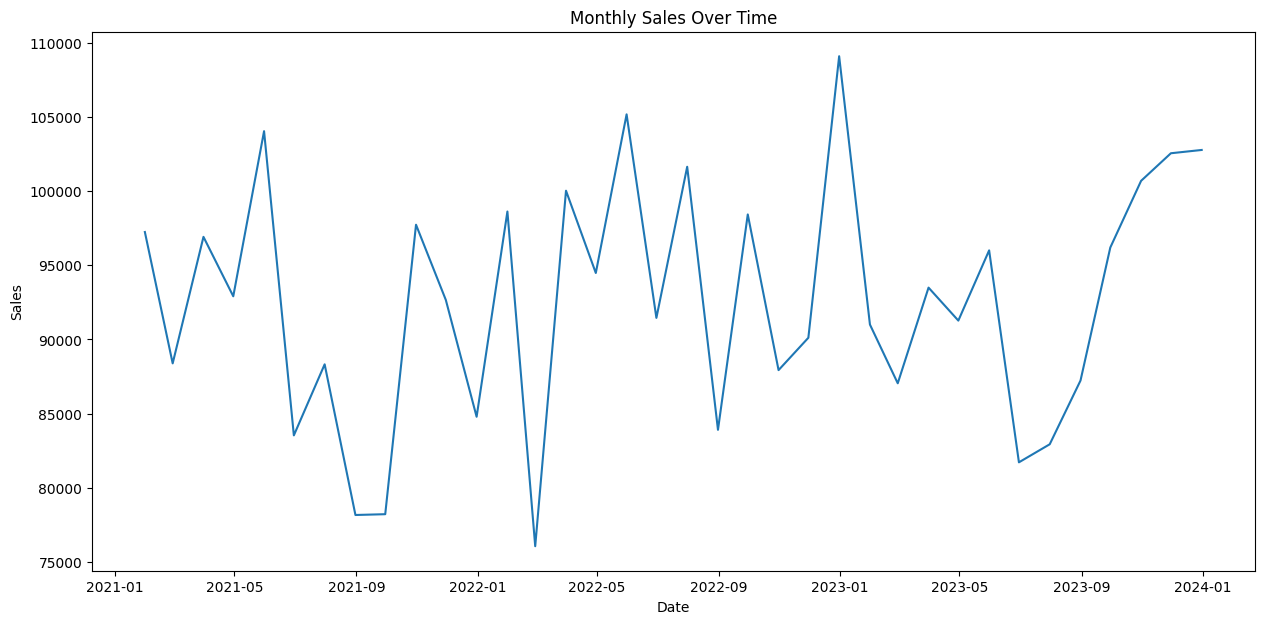

In [49]:
# 2.Monthly Sales Over Time
monthly_sales = df['Sales'].resample('M').sum()
# Monthly sales plot
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales)
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

C:\Users\hayyu.ragea\AppData\Local\Temp\ipykernel_19960\3134415635.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = data.set_index('Date').resample('M')['Sales'].sum()


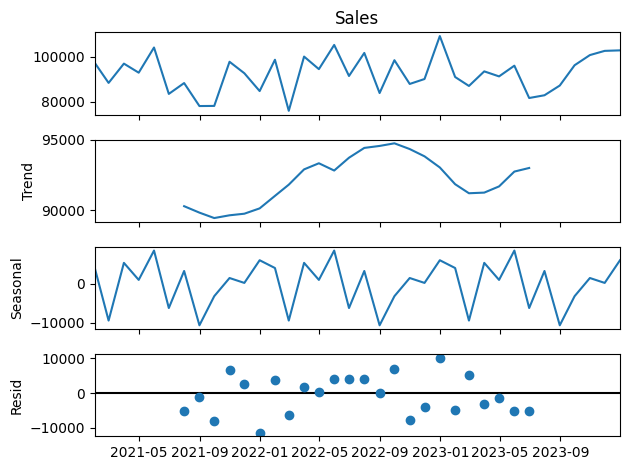

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load data
data = pd.read_csv('C:/Users/hayyu.ragea/AppData/Local/Programs/Python/Python312/Rossmann_Sales_Forecasting_Project/data/synthetic_sales_data.csv')

# Convert 'Date' to datetime if not already done
data['Date'] = pd.to_datetime(data['Date'])

# Group data by month (use datetime index instead of PeriodIndex to avoid issues)
monthly_sales = data.set_index('Date').resample('M')['Sales'].sum()

# 3. Seasonal Sales Decomposition
result = seasonal_decompose(monthly_sales, model='additive', period=12)  # Assuming a monthly period of 12
result.plot()
plt.tight_layout()
plt.show()


In [109]:
print(monthly_sales)

Date
2021-01-31     97252
2021-02-28     88384
2021-03-31     96925
2021-04-30     92913
2021-05-31    104059
2021-06-30     83524
2021-07-31     88320
2021-08-31     78149
2021-09-30     78203
2021-10-31     97744
2021-11-30     92666
2021-12-31     84780
2022-01-31     98636
2022-02-28     76041
2022-03-31    100041
2022-04-30     94486
2022-05-31    105194
2022-06-30     91454
2022-07-31    101656
2022-08-31     83899
2022-09-30     98437
2022-10-31     87929
2022-11-30     90113
2022-12-31    109119
2023-01-31     91005
2023-02-28     87040
2023-03-31     93498
2023-04-30     91272
2023-05-31     96013
2023-06-30     81705
2023-07-31     82923
2023-08-31     87226
2023-09-30     96206
2023-10-31    100707
2023-11-30    102569
2023-12-31    102791
Freq: ME, Name: Sales, dtype: int64


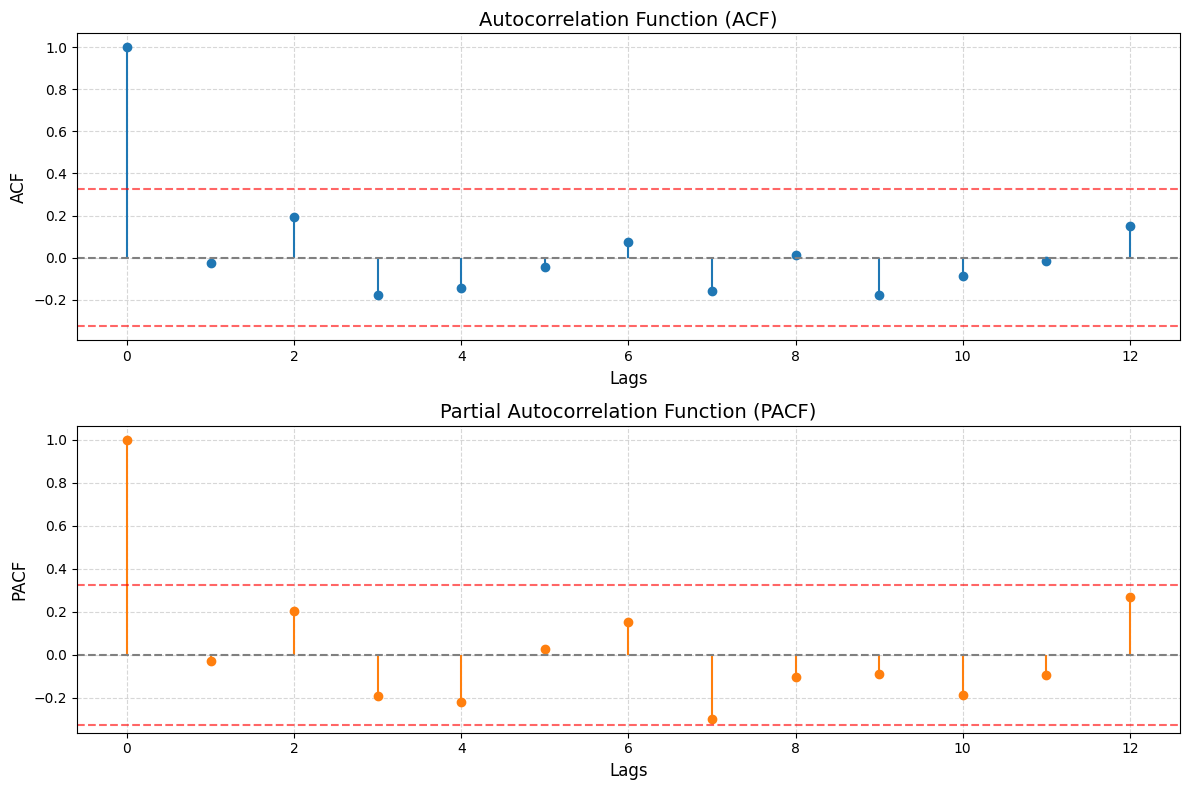

In [110]:
#4.Autocorrelation Function and Partial Autocorrelation Function
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import acf, pacf

# Assuming 'monthly_sales' is your time series data
# Define number of lags as 1/3 of the data length
n_lags = len(monthly_sales) // 3  

# Calculate ACF and PACF values
acf_values = acf(monthly_sales.dropna(), nlags=n_lags)
pacf_values = pacf(monthly_sales.dropna(), nlags=n_lags)

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plot ACF
ax1.stem(range(len(acf_values)), acf_values, basefmt=" ", 
         linefmt="C0-", markerfmt="C0o")
ax1.axhline(y=0, linestyle='--', color='gray')
ax1.axhline(y=-1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax1.axhline(y=1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax1.set_title('Autocorrelation Function (ACF)', fontsize=14)
ax1.set_xlabel('Lags', fontsize=12)
ax1.set_ylabel('ACF', fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.5)

# Plot PACF
ax2.stem(range(len(pacf_values)), pacf_values, basefmt=" ", 
         linefmt="C1-", markerfmt="C1o")
ax2.axhline(y=0, linestyle='--', color='gray')
ax2.axhline(y=-1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax2.axhline(y=1.96/np.sqrt(len(monthly_sales)), linestyle='--', color='red', alpha=0.6)
ax2.set_title('Partial Autocorrelation Function (PACF)', fontsize=14)
ax2.set_xlabel('Lags', fontsize=12)
ax2.set_ylabel('PACF', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()


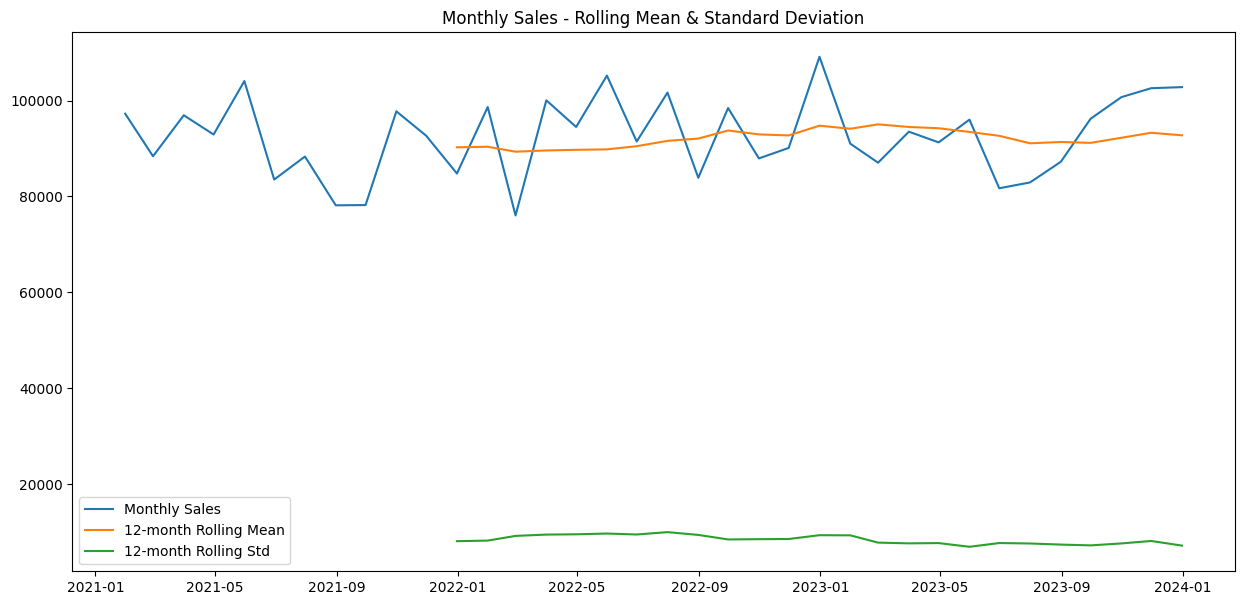

In [111]:
# 5. Rolling statistics
rolling_mean = monthly_sales.rolling(window=12).mean()
rolling_std = monthly_sales.rolling(window=12).std()

plt.figure(figsize=(15, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales')
plt.plot(rolling_mean.index, rolling_mean, label='12-month Rolling Mean')
plt.plot(rolling_std.index, rolling_std, label='12-month Rolling Std')
plt.legend()
plt.title('Monthly Sales - Rolling Mean & Standard Deviation')
plt.show()

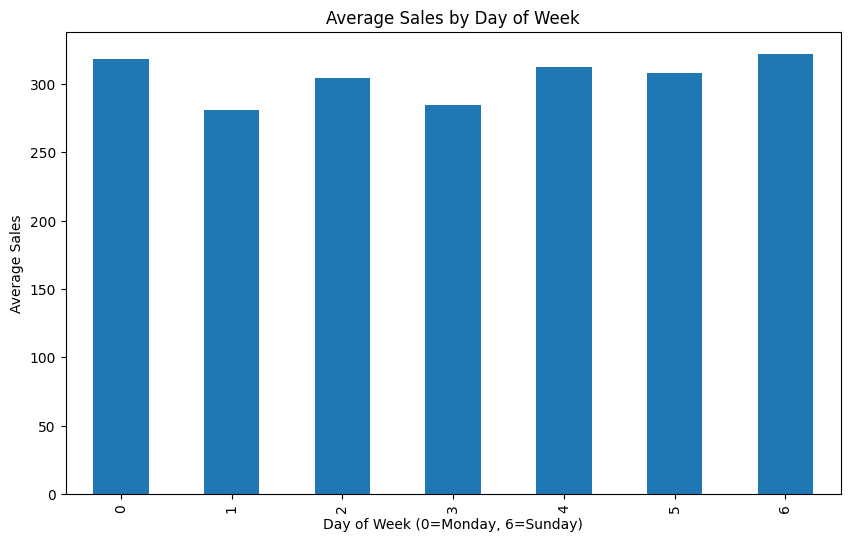

In [112]:
# 6. Day of week patterns
df['DayOfWeek'] = df.index.dayofweek
day_of_week_sales = df.groupby('DayOfWeek')['Sales'].mean()
day_of_week_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.show()

In [113]:
import holidays  # For handling holiday dates
us_holidays = holidays.US() 
def is_holiday(date):
    return 1 if date in us_holidays else 0
df['is_holiday'] = df.index.to_series().apply(is_holiday)
print(df.head())


            Store   Store_Type  Store_Status  Promo  Promo2  School_Holiday  \
Date                                                                          
2021-01-01      1  supermarket             1      0       0               0   
2021-01-02      1     pharmacy             1      0       0               0   
2021-01-03      1  supermarket             1      1       0               0   
2021-01-04      1  supermarket             0      1       0               0   
2021-01-05      1     pharmacy             1      1       0               0   

            Customers  Sales  DayOfWeek  is_holiday  IsHoliday  
Date                                                            
2021-01-01        124      0          4           1       True  
2021-01-02         87      0          5           0      False  
2021-01-03         74    778          6           0      False  
2021-01-04          0      0          0           0      False  
2021-01-05         76   1002          1           0     

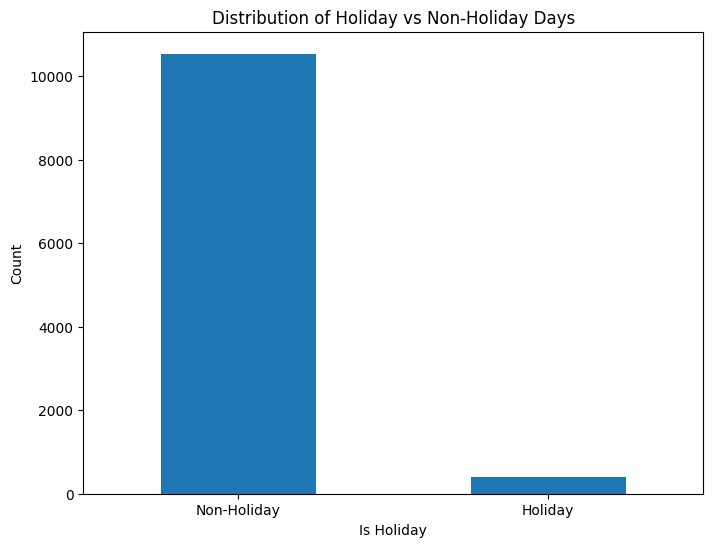

In [114]:

# 7.Visualize distribution of is_holiday
plt.figure(figsize=(8, 6))
df['is_holiday'].value_counts().plot(kind='bar')
plt.title('Distribution of Holiday vs Non-Holiday Days')
plt.xlabel('Is Holiday')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


2024-09-20 21:49:34,575 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:49:34,640 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


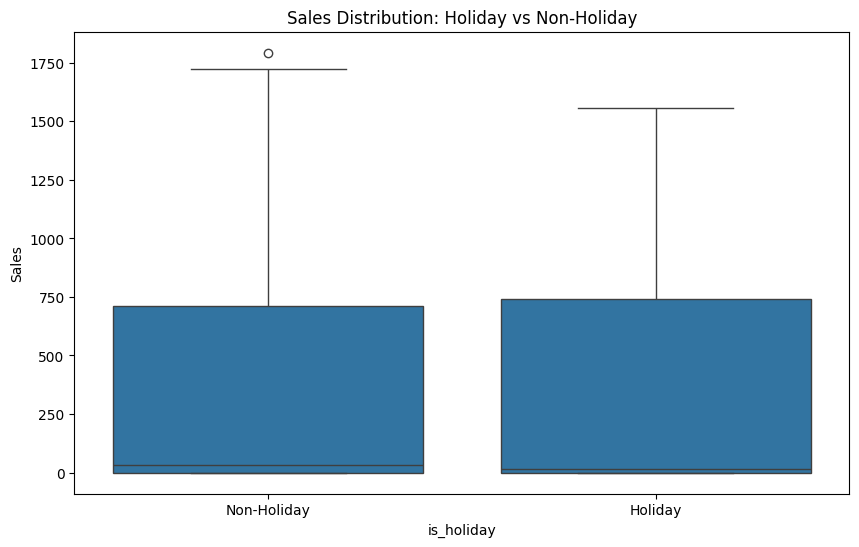

In [115]:

# 8.Visualize sales distribution for holiday vs non-holiday
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday', y='Sales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

In [116]:
# 9.Print summary statistics
print(df.groupby('DayOfWeek')['Sales'].describe())
print("\nHoliday vs Non-Holiday Sales:")
print(df.groupby('is_holiday')['Sales'].describe())

# Print the list of holidays in the dataset
holiday_dates = df[df['is_holiday'] == 1].index.tolist()
print("\nHolidays in the dataset:")
for date in holiday_dates:
    print(f"{date.date()}: {us_holidays.get(date)}")

            count        mean         std  min  25%   50%     75%     max
DayOfWeek                                                                
0          1560.0  318.338462  469.388808  0.0  0.0  34.0  770.50  1639.0
1          1560.0  280.810256  443.543271  0.0  0.0  30.5  291.00  1691.0
2          1560.0  304.339744  462.794149  0.0  0.0  28.0  725.00  1603.0
3          1560.0  284.910897  454.747902  0.0  0.0  23.5  322.25  1793.0
4          1570.0  312.052229  465.506055  0.0  0.0  37.5  742.00  1621.0
5          1570.0  307.989172  469.064582  0.0  0.0  37.5  705.75  1721.0
6          1570.0  321.981529  466.041927  0.0  0.0  43.0  790.00  1697.0

Holiday vs Non-Holiday Sales:
              count        mean         std  min  25%   50%     75%     max
is_holiday                                                                 
0           10540.0  304.158824  461.256830  0.0  0.0  34.0  713.25  1793.0
1             410.0  309.865854  475.748371  0.0  0.0  16.5  742.25  1557.0

2024-09-20 21:49:49,528 - INFO - Dataset loaded successfully.


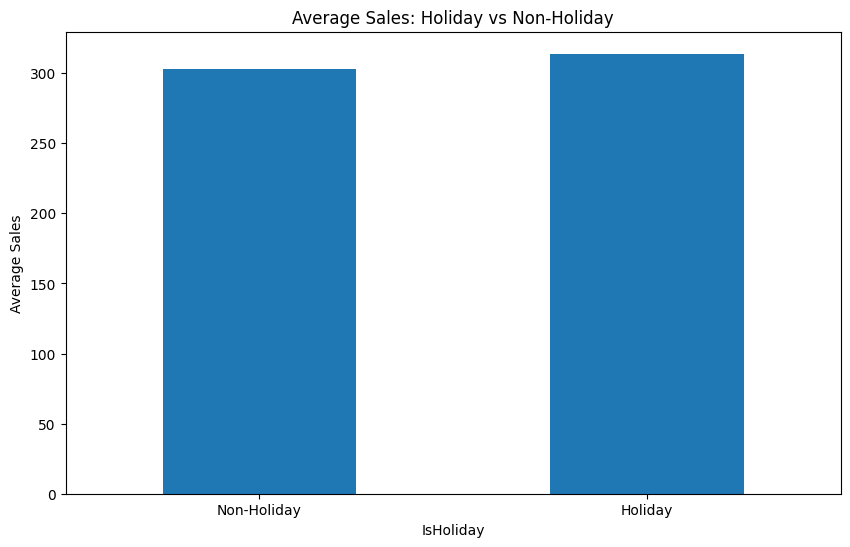

In [117]:
# 10.Average Sales: Holiday vs Non-Holiday
import pandas as pd
import holidays  
import logging 
import matplotlib.pyplot as plt


logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load the dataset
data_path = r'C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\Rossmann_Sales_Forecasting_Project\data\clean_data.csv'
df = pd.read_csv(data_path)

logging.info("Dataset loaded successfully.")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

us_holidays = holidays.US() 
def is_holiday(date):
    return 1 if date in us_holidays else 0

df['is_holiday'] = df.index.to_series().apply(is_holiday)
df['IsHoliday'] = df['is_holiday'] | (df.index.month == 12)  

# Group by IsHoliday and calculate average sales
holiday_effect = df.groupby('IsHoliday')['Sales'].mean()

# Plot the results
holiday_effect.plot(kind='bar', figsize=(10, 6))
plt.title('Average Sales: Holiday vs Non-Holiday')
plt.ylabel('Average Sales')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.show()


Monthly Average Sales: Promo vs No Promo
          No Promo        Promo
Date                           
2021-01  34.630137   985.362637
2021-02  28.096939   986.630952
2021-03  34.088372   943.115789
2021-04  31.838095   958.077778
2021-05  40.755760  1023.817204
2021-06  36.028037   881.558140
2021-07  40.277512   791.108911
2021-08  32.000000   864.060976
2021-09  38.575893   915.289474
2021-10  29.728111   981.645161
2021-11  30.840580   927.763441
2021-12  34.017937   887.287356
2022-01  40.640553   965.774194
2022-02  34.883495   930.472973
2022-03  29.212264   957.632653
2022-04  27.779817  1078.414634
2022-05  32.724138   921.037383
2022-06  36.848780   883.157895
2022-07  36.201005   850.918919
2022-08  41.195455   831.511111
2022-09  37.809524  1005.522222
2022-10  30.573991   932.310345
2022-11  38.633028   996.231707
2022-12  41.415459   976.174757
2023-01  37.336323   950.333333
2023-02  42.092308   927.435294
2023-03  34.977064   933.402174
2023-04  31.430622   930.802198

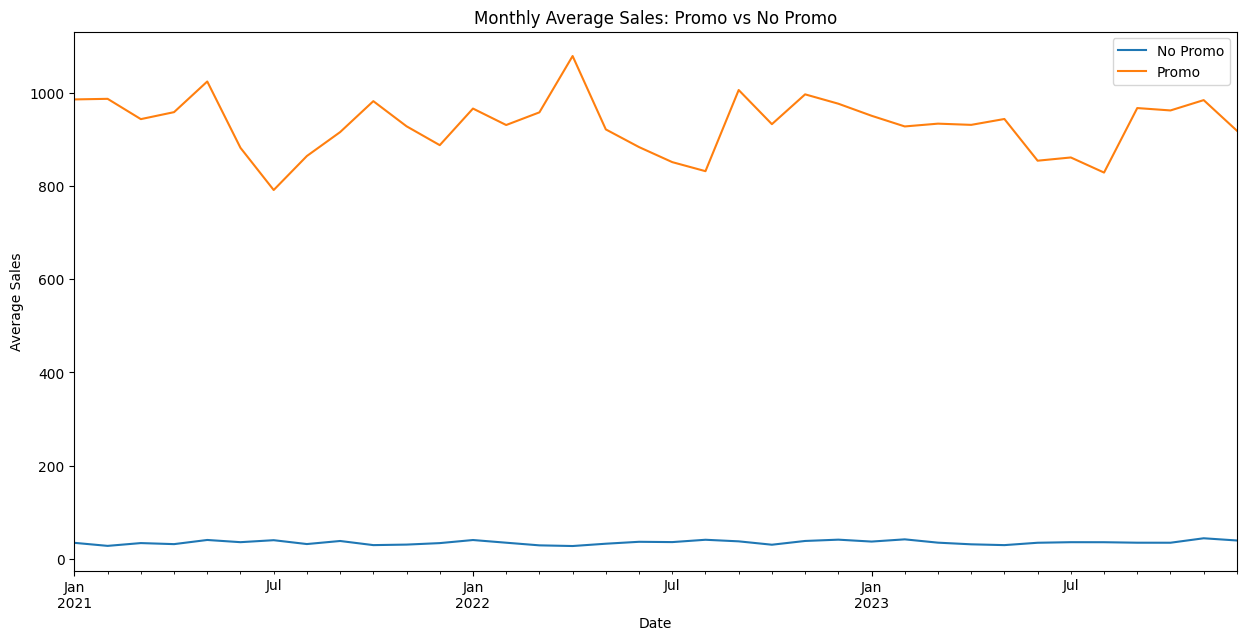

In [118]:
# 11. Promo effect over time
monthly_promo_sales = df.groupby([df.index.to_period('M'), 'Promo'])['Sales'].mean().unstack()

monthly_promo_sales.columns = ['No Promo', 'Promo']

# Display the data
print("Monthly Average Sales: Promo vs No Promo")
print(monthly_promo_sales)

# Calculate the difference and percentage increase
monthly_promo_sales['Difference'] = monthly_promo_sales['Promo'] - monthly_promo_sales['No Promo']
monthly_promo_sales['Percentage Increase'] = (monthly_promo_sales['Difference'] / monthly_promo_sales['No Promo']) * 100

print("\nDifference and Percentage Increase:")
print(monthly_promo_sales[['Difference', 'Percentage Increase']])
monthly_promo_sales[['No Promo', 'Promo']].plot(figsize=(15, 7))
plt.title('Monthly Average Sales: Promo vs No Promo')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(['No Promo', 'Promo'])
plt.show()

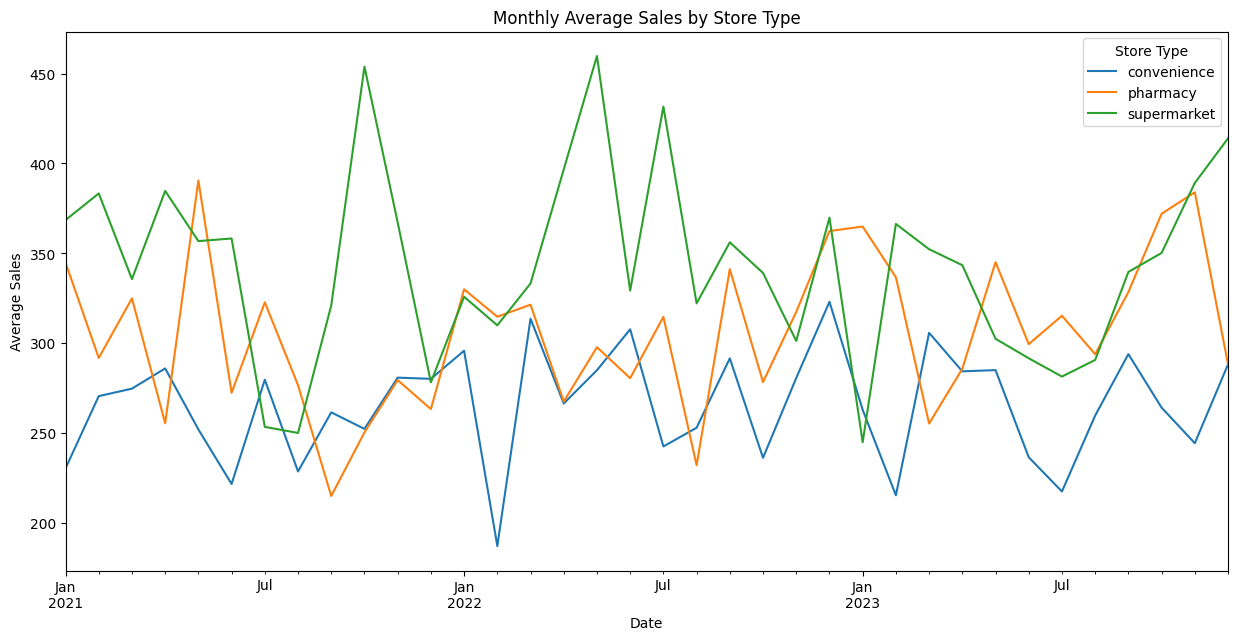

In [119]:
# 12. Store type performance over time
store_type_sales = df.groupby([df.index.to_period('M'), 'Store_Type'])['Sales'].mean().unstack()
store_type_sales.plot(figsize=(15, 7))
plt.title('Monthly Average Sales by Store Type')
plt.xlabel('Date')
plt.ylabel('Average Sales')
plt.legend(title='Store Type')
plt.show()

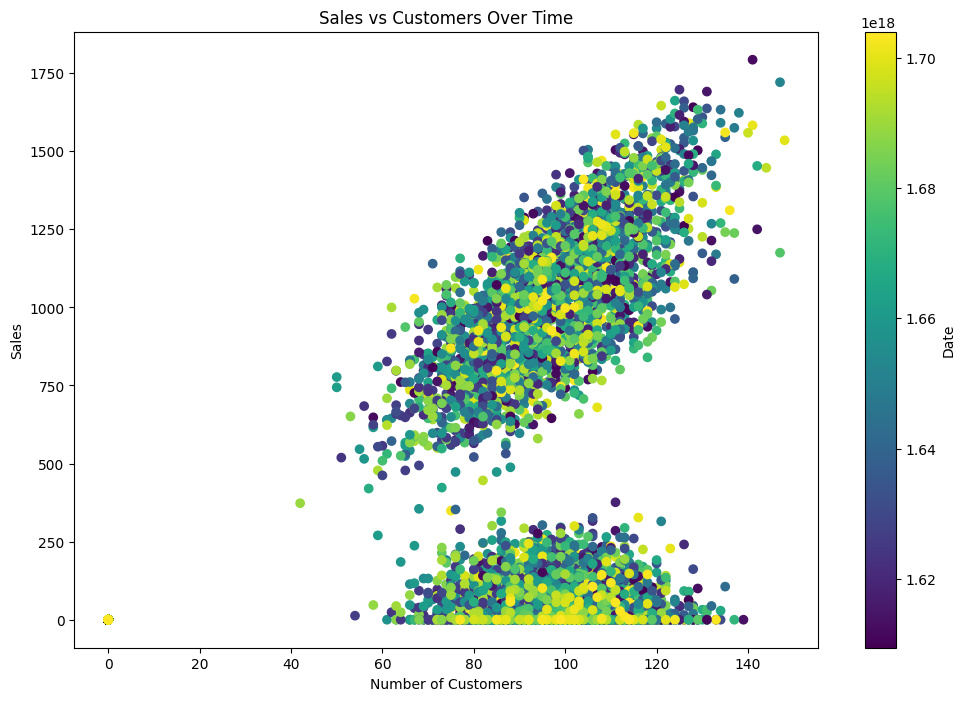

In [120]:
# 13. Sales vs Customers scatter plot with time color gradient
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Customers'], df['Sales'], c=df.index, cmap='viridis')
plt.colorbar(scatter, label='Date')
plt.title('Sales vs Customers Over Time')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

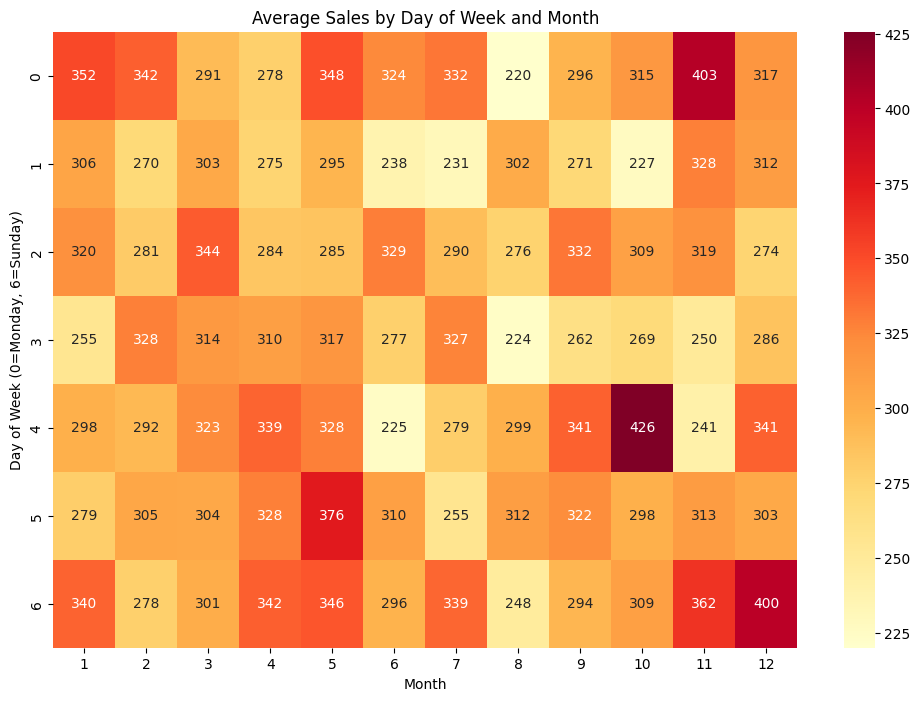

In [121]:
# 14. Heatmap of sales by day of week and month
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month
sales_heatmap = df.pivot_table(values='Sales', index='DayOfWeek', columns='Month', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, cmap='YlOrRd', annot=True, fmt='.0f')
plt.title('Average Sales by Day of Week and Month')
plt.xlabel('Month')
plt.ylabel('Day of Week (0=Monday, 6=Sunday)')
plt.show()

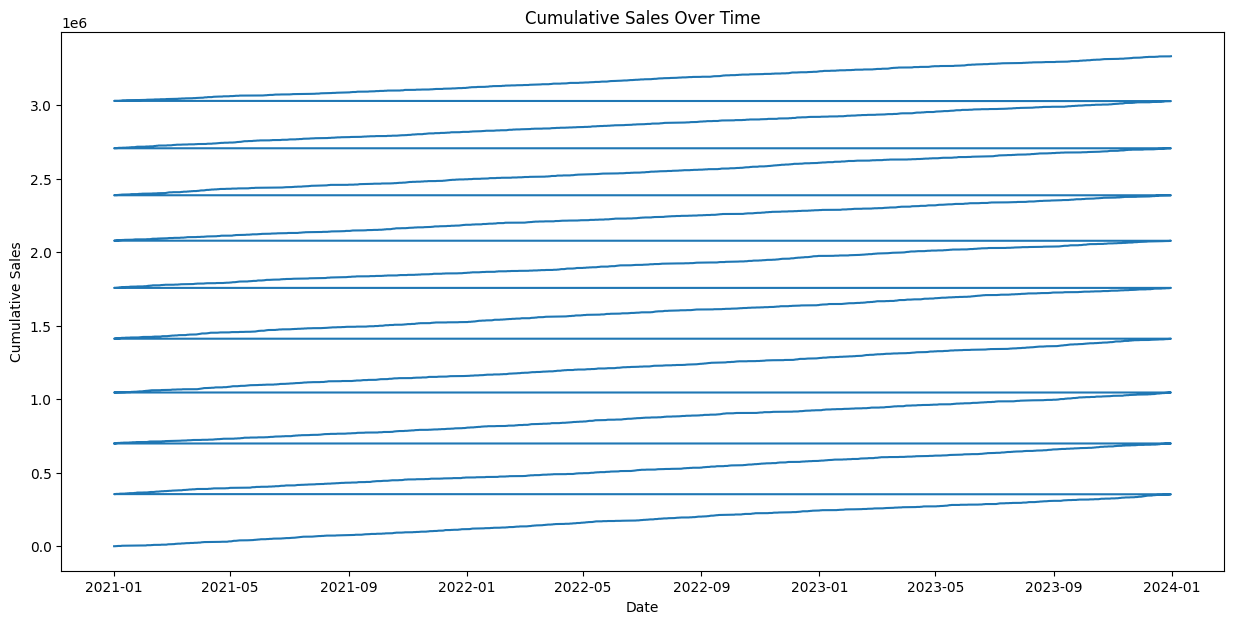

In [122]:
# 15. Cumulative sales
df['CumulativeSales'] = df['Sales'].cumsum()
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['CumulativeSales'])
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.show()

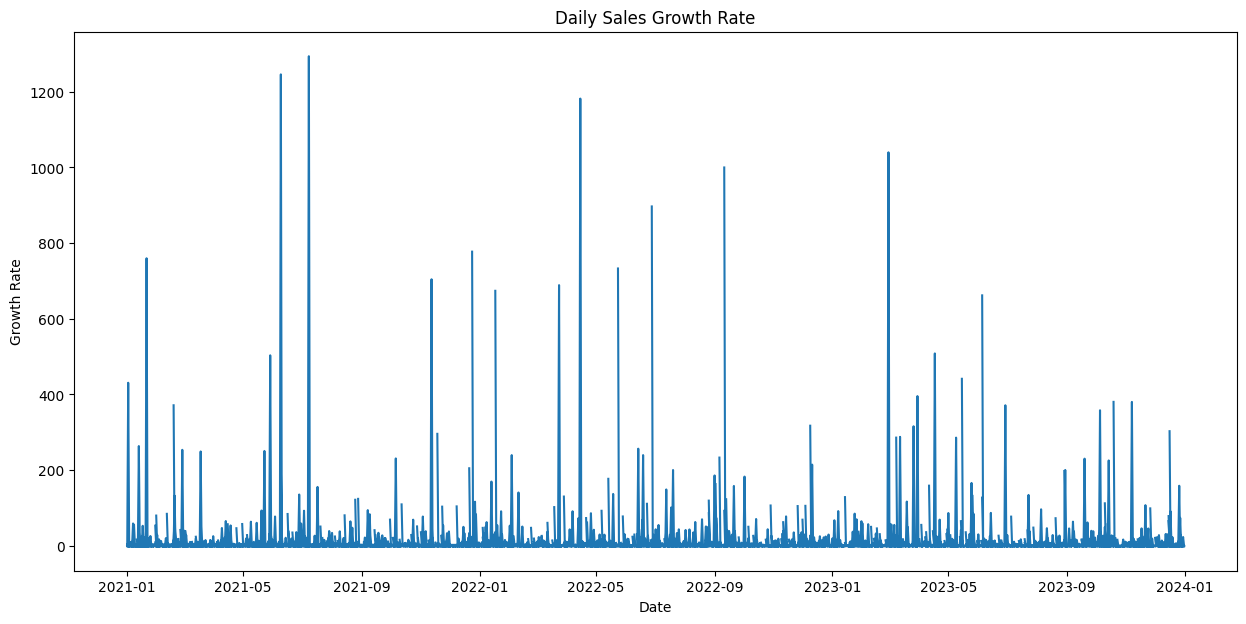

In [123]:
# 16. Sales growth rate
df['SalesGrowthRate'] = df['Sales'].pct_change()
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['SalesGrowthRate'])
plt.title('Daily Sales Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate')
plt.show()

In [124]:
features_to_remove = ['MA30', 'SD30', 'SalesGrowthRate','IsHoliday','CumulativeSales']
df_cleaned = df.drop(columns=features_to_remove, errors='ignore')

In [125]:
df_cleaned

,Store,Store_Type,Store_Status,Promo,Promo2,School_Holiday,Customers,Sales,DayOfWeek,is_holiday,Month
Date,,,,,,,,,,,
2021-01-01,1,supermarket,1,0,0,0,124,0,4,1,1
2021-01-02,1,pharmacy,1,0,0,0,87,0,5,0,1
2021-01-03,1,supermarket,1,1,0,0,74,778,6,0,1
2021-01-04,1,supermarket,0,1,0,0,0,0,0,0,1
2021-01-05,1,pharmacy,1,1,0,0,76,1002,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,10,pharmacy,1,0,1,0,112,28,2,0,12
2023-12-28,10,convenience,1,0,0,0,111,55,3,0,12
2023-12-29,10,convenience,1,0,0,0,99,0,4,0,12


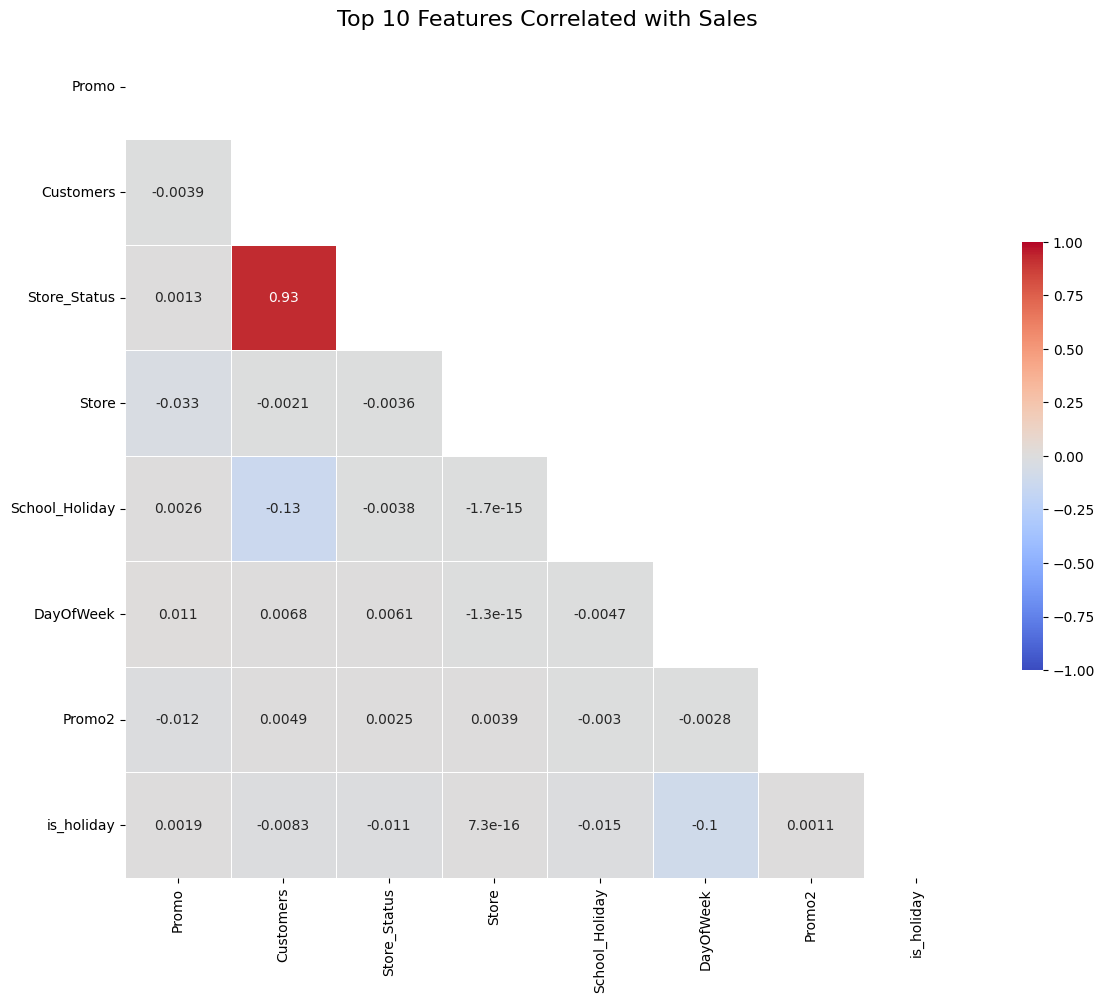

Correlations with Sales:
Promo             0.888812
Customers         0.243039
Store_Status      0.220830
Store             0.032167
School_Holiday    0.027882
DayOfWeek         0.011325
Promo2            0.008017
is_holiday        0.002346
Name: Sales, dtype: float64


In [126]:
# 17.Top 10 Features Correlated with Sales
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_path = r'C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\Rossmann_Sales_Forecasting_Project\data\clean_data.csv'
df_cleaned = pd.read_csv(data_path)

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
correlations = df_cleaned[numeric_columns].corr()['Sales'].abs().sort_values(ascending=False)
top_features = correlations.index[1:11].tolist()
f_correlation = df_cleaned[top_features].corr()
f_mask = np.triu(np.ones_like(f_correlation, dtype=bool))
f_fig, f_ax = plt.subplots(figsize=(12, 10))
sns.heatmap(f_correlation, mask=f_mask, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Top 10 Features Correlated with Sales', fontsize=16)
plt.tight_layout()
plt.show()

# Print the correlation values
print("Correlations with Sales:")
print(correlations[top_features])


2024-09-20 21:51:00,011 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:51:00,097 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


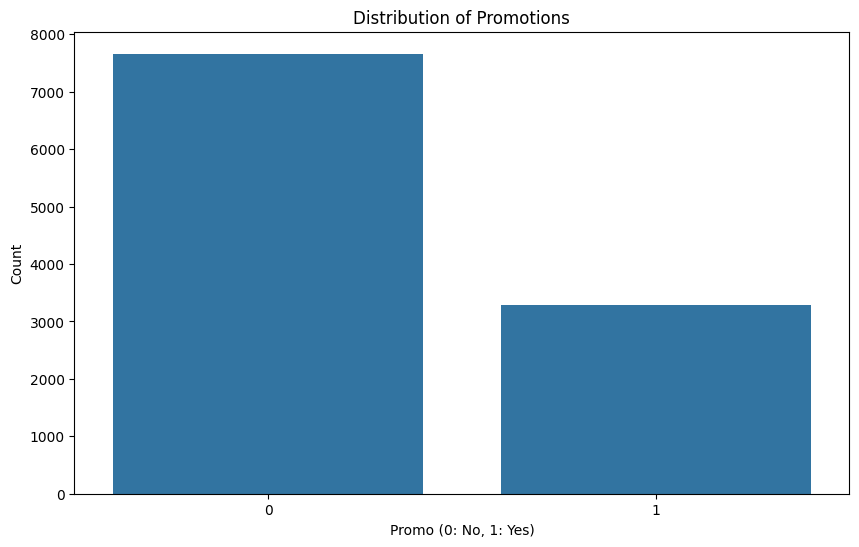

In [127]:
# 18. Distribution of Promotions
plt.figure(figsize=(10, 6))
sns.countplot(x='Promo', data=data)
plt.title('Distribution of Promotions')
plt.xlabel('Promo (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


In [128]:
import pandas as pd

# Load the CSV file
file_path = r'C:\Users\hayyu.ragea\AppData\Local\Programs\Python\Python312\Rossmann_Sales_Forecasting_Project\data\synthetic_sales_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

# Check the columns in the data
print(data.columns)


         Date  Store   Store_Type  Store_Status  Promo  Promo2  \
0  2021-01-01      1  supermarket             1      0       0   
1  2021-01-02      1     pharmacy             1      0       0   
2  2021-01-03      1  supermarket             1      1       0   
3  2021-01-04      1  supermarket             0      1       0   
4  2021-01-05      1     pharmacy             1      1       0   

   School_Holiday  Customers  Sales  
0               0        124      0  
1               0         87      0  
2               0         74    778  
3               0          0      0  
4               0         76   1002  
Index(['Date', 'Store', 'Store_Type', 'Store_Status', 'Promo', 'Promo2',
       'School_Holiday', 'Customers', 'Sales'],
      dtype='object')


2024-09-20 21:51:10,826 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:51:10,861 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


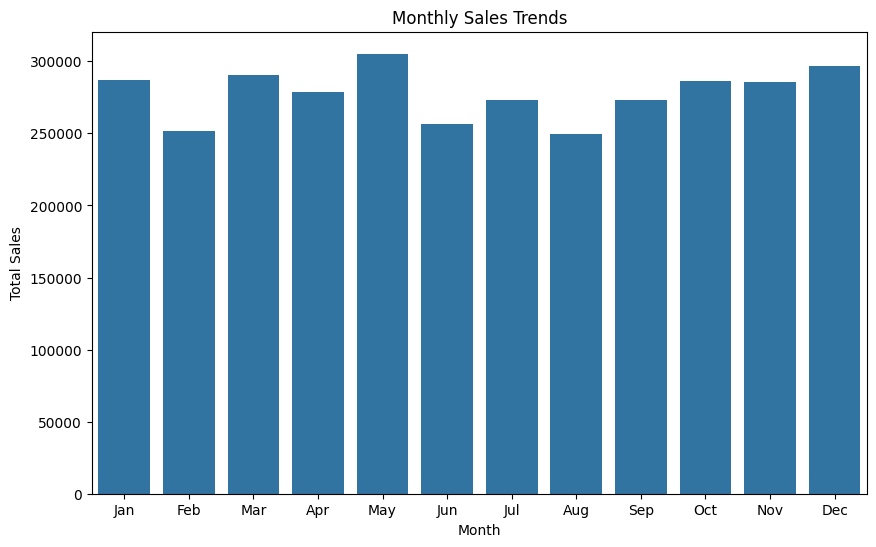

In [129]:
# 19.Monthly Sales Trends
data['Date'] = pd.to_datetime(data['Date'])

# Extract the month from the Date column
data['Month'] = data['Date'].dt.month

# Group the data by month and calculate total sales
monthly_sales = data.groupby('Month')['Sales'].sum().reset_index()

# Plot the monthly sales trends
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Customizing month labels
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


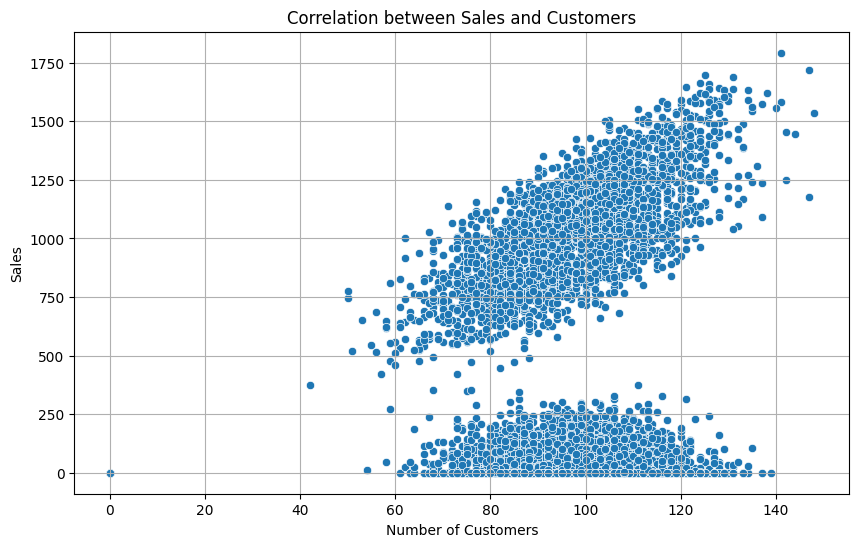

2024-09-20 21:51:18,842 - INFO - Correlation between Sales and Customers: 0.24303930089426298


In [130]:
# 20.Correlation between sales and number of customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=data)
plt.title('Correlation between Sales and Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.grid()
plt.show()

# Calculate correlation coefficient
correlation = data['Sales'].corr(data['Customers'])
logging.info(f'Correlation between Sales and Customers: {correlation}')


2024-09-20 21:51:23,017 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 21:51:23,063 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


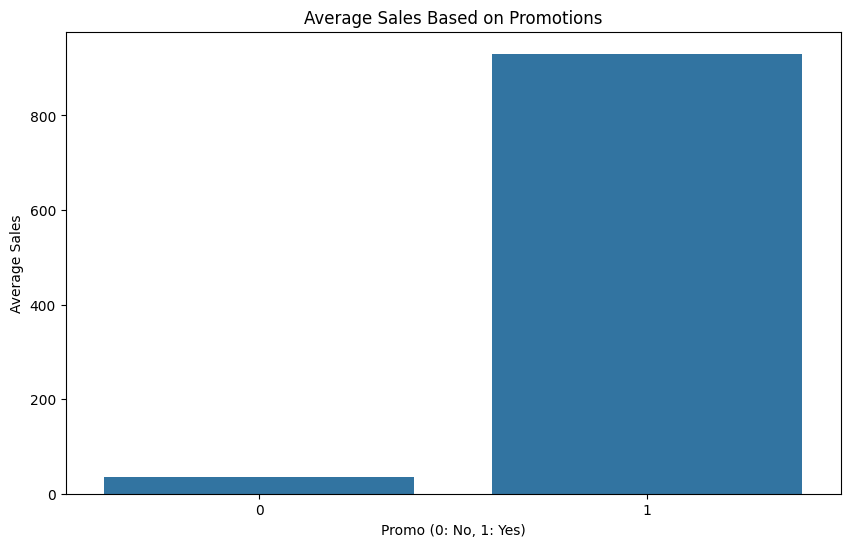

In [131]:
# 21.How promotions affect sales
promo_sales = data.groupby('Promo')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Average Sales Based on Promotions')
plt.xlabel('Promo (0: No, 1: Yes)')
plt.ylabel('Average Sales')
plt.show()


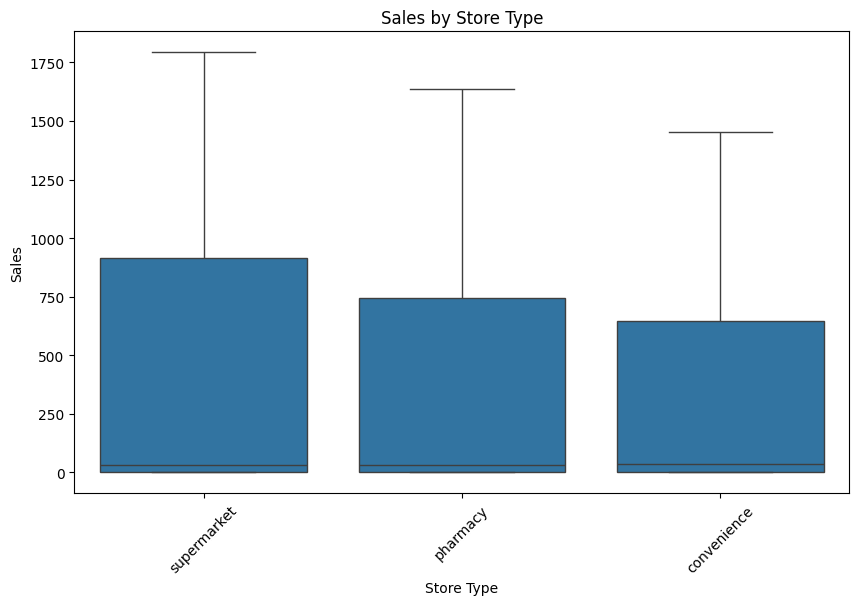

In [92]:
# 22.Trends of customer behavior during store opening and closing times
plt.figure(figsize=(10, 6))
if 'Store_Type' in data.columns:
    sns.boxplot(x='Store_Type', y='Sales', data=data)
    plt.title('Sales by Store Type')
    plt.xlabel('Store Type')
    plt.ylabel('Sales')
    plt.xticks(rotation=45)  
    plt.show()
else:
    print("Column 'Store_Type' not found. Available columns:", data.columns)


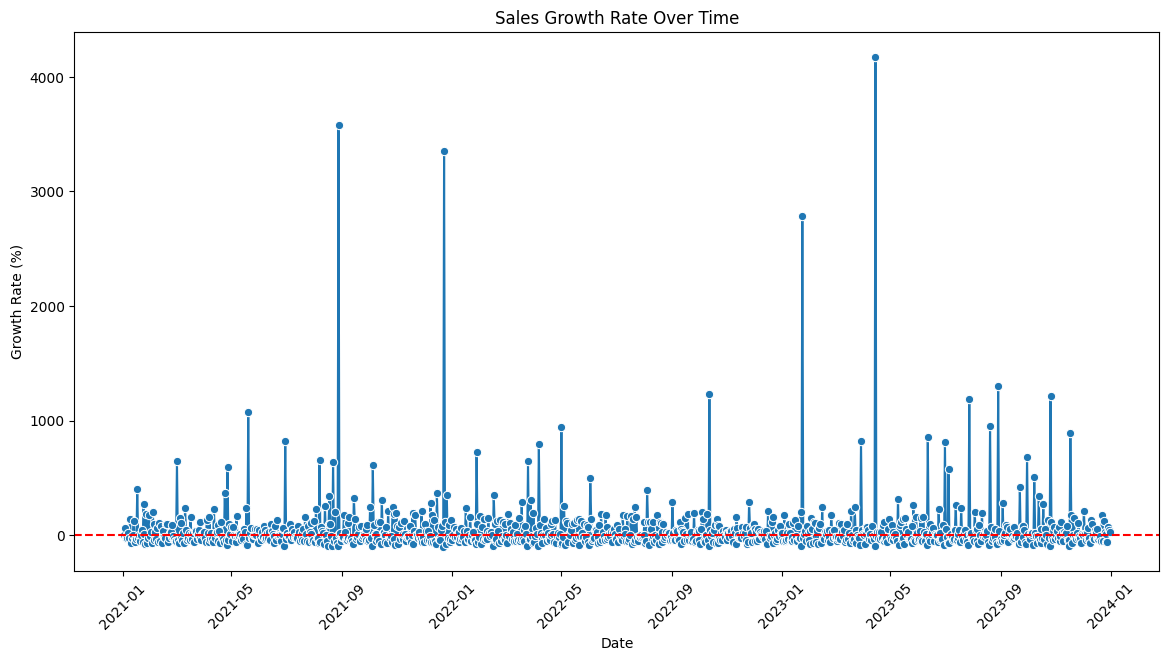

In [93]:
# 23 .Sales Growth Rate Over Time
data['Date'] = pd.to_datetime(data['Date'])
daily_sales = data.groupby('Date')['Sales'].sum().reset_index()
daily_sales['Growth_Rate'] = daily_sales['Sales'].pct_change() * 100

# Plotting the sales growth rate
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_sales, x='Date', y='Growth_Rate', marker='o')
plt.title('Sales Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='red', linestyle='--')  
plt.xticks(rotation=45)  
plt.show()


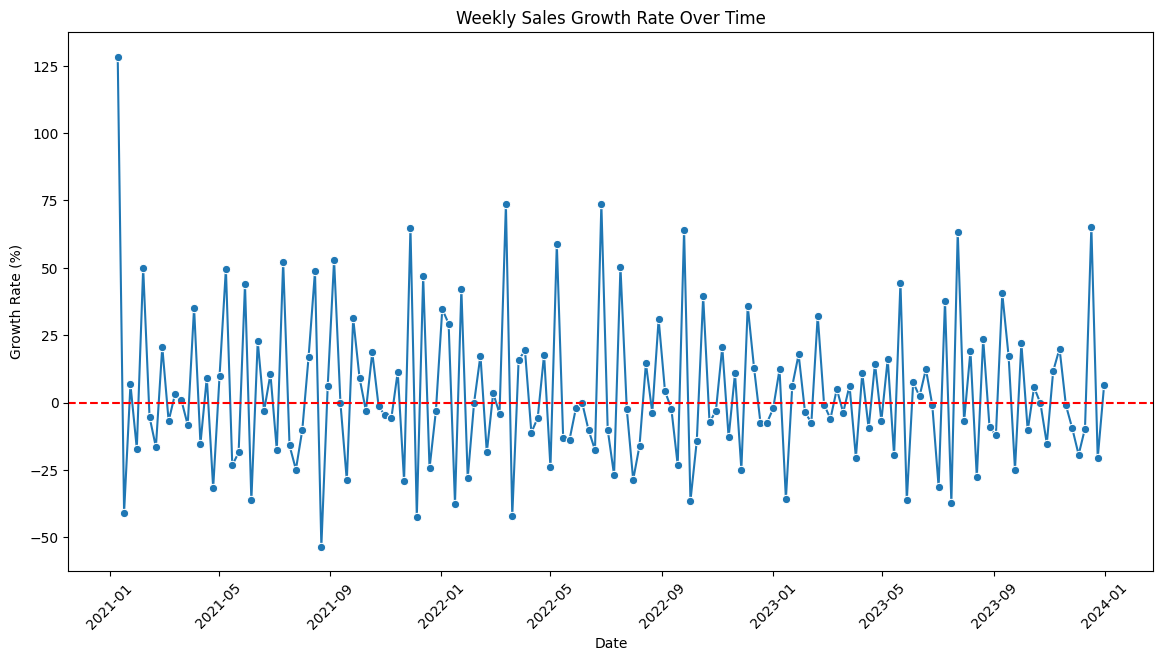

In [132]:
# 24 .Weekly Sales Growth Rate Over Time
data['Date'] = pd.to_datetime(data['Date'])

daily_sales = data.groupby('Date')['Sales'].sum().reset_index()

daily_sales.set_index('Date', inplace=True)

weekly_sales = daily_sales.resample('W').sum().reset_index()
weekly_sales['Growth_Rate'] = weekly_sales['Sales'].pct_change() * 100
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_sales, x='Date', y='Growth_Rate', marker='o')
plt.title('Weekly Sales Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='red', linestyle='--')  
plt.xticks(rotation=45) 
plt.show()


C:\Users\hayyu.ragea\AppData\Local\Temp\ipykernel_19960\1473616536.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample('M').sum().reset_index()


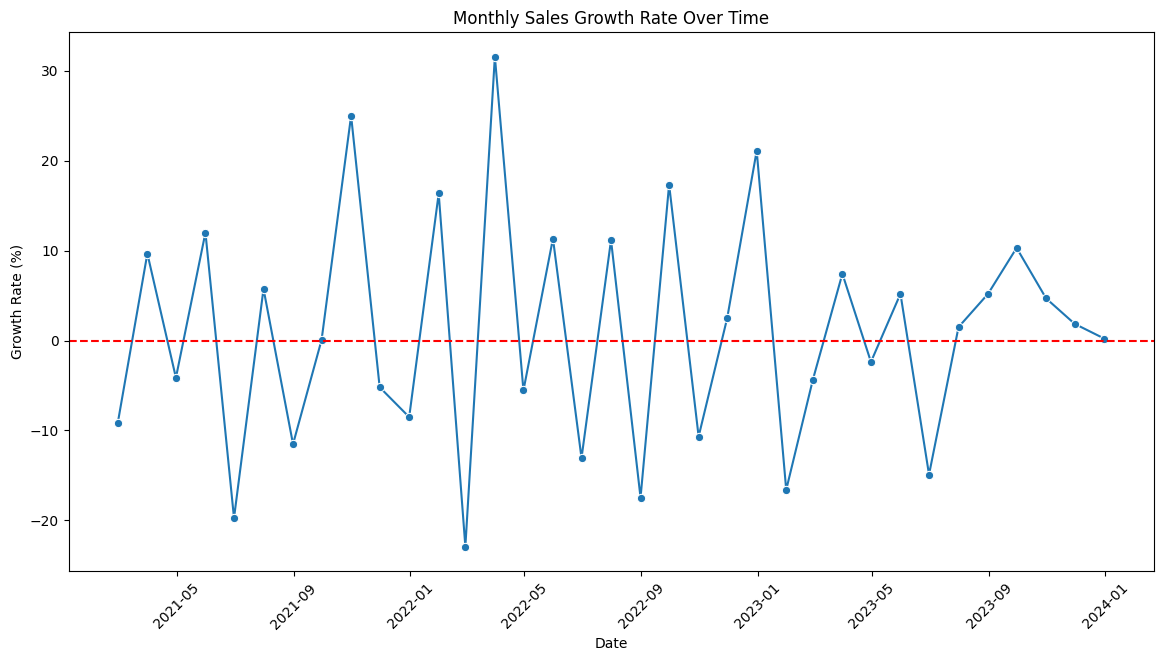

In [133]:
#25. Monthly Sales Growth Rate Over Time
data['Date'] = pd.to_datetime(data['Date'])
daily_sales = data.groupby('Date')['Sales'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)
monthly_sales = daily_sales.resample('M').sum().reset_index()
monthly_sales['Growth_Rate'] = monthly_sales['Sales'].pct_change() * 100
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='Date', y='Growth_Rate', marker='o')
plt.title('Monthly Sales Growth Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='red', linestyle='--')  
plt.xticks(rotation=45)  
plt.show()


C:\Users\hayyu.ragea\AppData\Local\Temp\ipykernel_19960\338934350.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample('M').sum().reset_index()


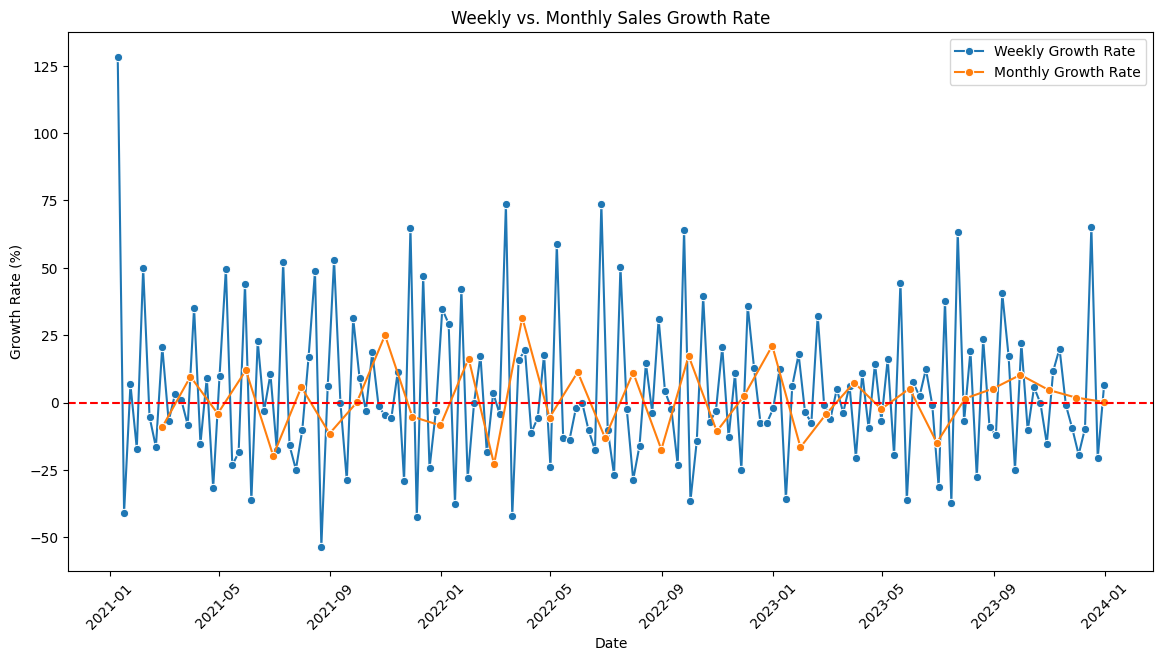

In [134]:
#26.Weekly vs. Monthly Sales Growth Rate
data['Date'] = pd.to_datetime(data['Date'])

daily_sales = data.groupby('Date')['Sales'].sum().reset_index()
daily_sales.set_index('Date', inplace=True)
weekly_sales = daily_sales.resample('W').sum().reset_index()
weekly_sales['Growth_Rate'] = weekly_sales['Sales'].pct_change() * 100
monthly_sales = daily_sales.resample('M').sum().reset_index()
monthly_sales['Growth_Rate'] = monthly_sales['Sales'].pct_change() * 100
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_sales, x='Date', y='Growth_Rate', marker='o', label='Weekly Growth Rate')
sns.lineplot(data=monthly_sales, x='Date', y='Growth_Rate', marker='o', label='Monthly Growth Rate')

plt.title('Weekly vs. Monthly Sales Growth Rate')
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='red', linestyle='--')  # Line at zero growth
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()


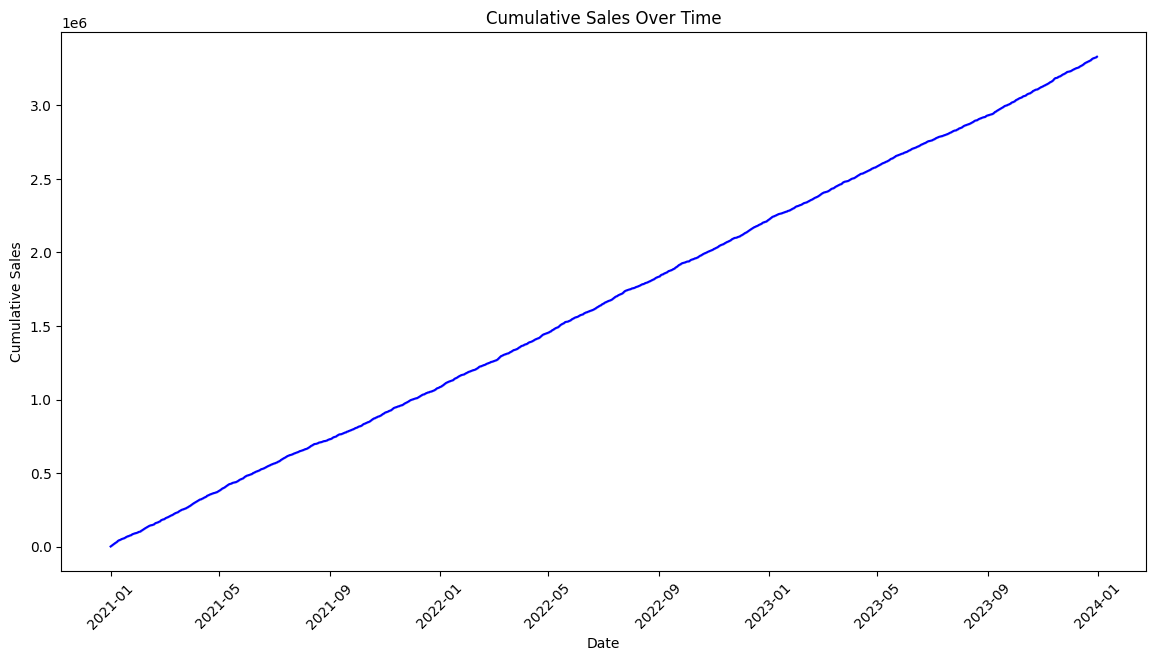

In [135]:
#27 . Cumulative sales over time
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data['Cumulative_Sales'] = data['Sales'].cumsum()
plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='Date', y='Cumulative_Sales', color='blue')
plt.title('Cumulative Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Sales')
plt.xticks(rotation=45)
plt.show()


In [104]:
# Summary of findings
print("Summary of Exploratory Data Analysis (EDA)\n")
print("1.Customer Behavior Analysis:")
print("   - Sales Patterns: Significant variations around holidays, with peaks during promotional events.")
print("   - Impact of Promotions: Promotions led to higher sales, attracting new and returning customers.")
print("\n2. Sales Growth Metrics:")
print("   - Weekly Growth Rate: Fluctuations observed, influenced by campaigns and seasonal events.")
print("   - Monthly Growth Rate: Insights into overall trends, identifying growth or decline periods.")
print("\n3. Cumulative Sales Trends:")
print("   - Steady upward trajectory, significant growth during promotions and holidays.")
print("   - Consistent growth reinforcing effective marketing strategies.")
print("\n4. Comparative Analysis:")
print("   - Relationship between weekly and monthly growth highlights the importance of trends.")
print("   - Cumulative metrics indicate leveraging peak shopping periods effectively.")
print("\n5. :")
print("   - Focus on promotion effectiveness and customer segmentation.")
print("   - Develop predictive models for enhanced sales forecasting.")


Summary of Exploratory Data Analysis (EDA)

1.Customer Behavior Analysis:
   - Sales Patterns: Significant variations around holidays, with peaks during promotional events.
   - Impact of Promotions: Promotions led to higher sales, attracting new and returning customers.

2. Sales Growth Metrics:
   - Weekly Growth Rate: Fluctuations observed, influenced by campaigns and seasonal events.
   - Monthly Growth Rate: Insights into overall trends, identifying growth or decline periods.

3. Cumulative Sales Trends:
   - Steady upward trajectory, significant growth during promotions and holidays.
   - Consistent growth reinforcing effective marketing strategies.

4. Comparative Analysis:
   - Relationship between weekly and monthly growth highlights the importance of trends.
   - Cumulative metrics indicate leveraging peak shopping periods effectively.

5. :
   - Focus on promotion effectiveness and customer segmentation.
   - Develop predictive models for enhanced sales forecasting.
